<a href="https://colab.research.google.com/github/stepsbtw/Statistical-Inference/blob/main/GCC1625_T4_CAIO_PASSOS_TORKST_FERREIRA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GCC1625 - Inferência Estatística - Trabalho 4
**Nome:** Caio Passos Torkst Ferreira

**Link do vídeo:** https://youtu.be/9inU0UqH9SY

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## 1) GLMs - Regressão Logística

A regressão logística é uma ferramenta fundamental na modelagem de variáveis categóricas binárias.
Neste item avaliativo, você aplicará esse modelo para identificar fatores associados à sobrevivência de passageiros no naufrágio do Titanic.

In [121]:
import pandas as pd

df = pd.read_csv("titanic.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 1. Ajustar um modelo de regressão logística para prever Survived, utilizando pelo menos três variáveis explicativas: Sex, Pclass, Age, SibSp, ou outras de sua escolha.

Vamos utilizar Age, mas existem valores faltantes. Tratar!

In [122]:
df_clean = df.dropna(subset=["Age"])
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    object 
 4   Sex          714 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        714 non-null    int64  
 7   Parch        714 non-null    int64  
 8   Ticket       714 non-null    object 
 9   Fare         714 non-null    float64
 10  Cabin        185 non-null    object 
 11  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.5+ KB


Sex é variável categórica, preciso transformar em binária

In [123]:
df_clean["Sex_bin"] = (df_clean["Sex"] == "female").astype(int)
# 1 fem 0 masc

/tmp/ipython-input-123-2187651300.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Sex_bin"] = (df_clean["Sex"] == "female").astype(int)


In [124]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

X = df_clean[["Sex_bin", "Age", "SibSp", "Pclass"]].values
X_ = sm.add_constant(X)
y = df_clean["Survived"].values

X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.2)

model = sm.Logit(y_train, X_train)
model_fit = model.fit()

print(model_fit.summary())

Optimization terminated successfully.
         Current function value: 0.453257
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  571
Model:                          Logit   Df Residuals:                      566
Method:                           MLE   Df Model:                            4
Date:                Tue, 15 Jul 2025   Pseudo R-squ.:                  0.3333
Time:                        19:14:11   Log-Likelihood:                -258.81
converged:                       True   LL-Null:                       -388.18
Covariance Type:            nonrobust   LLR p-value:                 8.520e-55
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4718      0.543      6.393      0.000       2.407       4.536
x1             2.5345      0.

### 2. Interpretar os coeficientes estimados, com especial atenção para o significado de sinais positivos e negativos em termos da chance de sobrevivência.

Na regressão logística, e^(coeficiente) indica a influência no valor de y ser 1.

- O gênero (x1) possui uma relação positiva com a predição, ou seja, ser do sexo feminino te faz mais provável de sobreviver.

- O número de irmãos/cônjuge (x3) tem relação negativa com a predição, ou seja, ter mais te faz menos provável de sobreviver.

- A idade (x2) não parece influenciar muito na predição (pouco mas negativo).

- A classe do ticket (x4) tem relação negativa com a predição, ou seja, ser de classe maior - mais baixa - (primeira, segunda, terceira) te faz menor provável de sobreviver.

- O intercepto (constante) representa, o valor esperado de y quando todas as variáveis independentes são iguais a 0, ou seja, sem saber nenhuma informação sobre o indivíduo qual sua probabilidade esperada de sobrevivência.


###3. Avaliar a significância estatística dos coeficientes e discutir quais variáveis possuem maior impacto na predição.

Com essas variáveis de treino para o modelo, todos os coeficientes são estatisticamente significativos, isto é, seus p-valores são menores que 0.05

### 4. Calcular a probabilidade estimada de sobrevivência para um passageiro do sexo feminino, 25 anos, na 1ª classe, viajando sozinho.

In [125]:
import numpy as np

x = np.array([1,1,25,0,1]) # adicionei constante direto
pred = model_fit.predict(x)
print(pred)

[0.96465464]


### 5. Avaliar o desempenho do modelo com métricas como acurácia, precisão, recall e matriz de confusão.

In [126]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score

y_pred = model_fit.predict(X_test)
y_pred_bin = (y_pred >= 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred_bin)
print(cm)

TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]

print("accuracy = ", (TP + TN) / (TP+FP+TN+FN))
print("precision = ", TP / (TP+FP))
print("recall = ", TP / (TP+FN))


[[77 15]
 [13 38]]
accuracy =  0.8041958041958042
precision =  0.7169811320754716
recall =  0.7450980392156863


### 6. Verificar graficamente se há padrões nos resíduos de Pearson que indiquem problemas de ajuste.

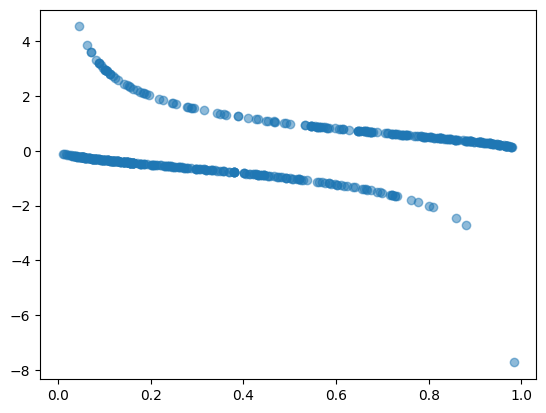

In [127]:
y_train_pred = model_fit.predict(X_train)

residuos = model_fit.resid_pearson

plt.scatter(y_train_pred, residuos, alpha=0.5)
plt.show()

# quao distante o observado esta do previsto, valores bons devem estar em torno de 0
# acha "outliers", valores grandes (em modulo)

A relação entre os preditores e a predição é não-linear, a Regressão Linear não é adequada neste caso.

## 2) GLMs - Regressão de Poisson

Modelos Lineares Generalizados (GLMs) oferecem uma estrutura flexível para modelar variáveis resposta com distribuições da família exponencial.
Nesta tarefa, você irá explorar um caso em que a variável resposta é de contagem, ajustando modelos alternativos e avaliando a qualidade do ajuste.

1. Ajustar um modelo de regressão de Poisson para modelar a variável ‘cnt‘ com base em pelo menos três variáveis explicativas de sua escolha.


In [215]:
df = pd.read_csv("day.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Season : 	1:winter, 2:spring, 3:summer, 4:fall

Weekday : 0: sunday, 1: monday, 2: tuesday, 3: wednesday, 4: thursday, 5: friday, 6: saturday

In [216]:
X = df[["weekday","season","temp"]]
X_ = sm.add_constant(X)
y = df["cnt"]

X_train, X_test, y_train, y_test = train_test_split(X_,y,test_size=0.2)

poisson = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

print(poisson.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    cnt   No. Observations:                  584
Model:                            GLM   Df Residuals:                      580
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.6243e+05
Date:                Tue, 15 Jul 2025   Deviance:                   3.1896e+05
Time:                        21:57:08   Pearson chi2:                 3.01e+05
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.3939      0.002   2967.964      0.0

2. Avaliar a presença de overdispersion comparando a deviance ao número de graus de liberdade. Em caso afirmativo, ajustar um modelo quasi-Poisson.


Overdispersion : Ocorre quando a variância dos dados observados é maior que a variância esperada pelo modelo.

Na distribuição Poisson : $Var(Y) = \mathbb{E}(Y)$.
- Se $Var(Y) > \mathbb{E}(Y)$, overdispersion.

Deviance : Medida de qualidade do ajuste em GLM, mede quao distante do modelo perfeito.

Se deviance >> graus de liberdade, overdispersion.
Teste com deviance / graus de liberade.

Quando tiver overdispersion, o erro padrão é subestimado.

In [217]:
dev = poisson.deviance
dof = len(X_train) - 4

print(dev)
print(dof)
print(dev/dof) # absurdamente overdispersed

318961.1752439251
580
549.9330607653882


Um modelo quasi-poisson ajusta sua variância com um fator de dispersão.
$Var(Y) = 𝜙 * \mathbb{E}(Y)$

In [218]:
# erro robusto -> equivalente a quasi poisson (nao nativo no python)
quasi_poisson = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit(cov_type='HC0')
print(quasi_poisson.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    cnt   No. Observations:                  584
Model:                            GLM   Df Residuals:                      580
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.6243e+05
Date:                Tue, 15 Jul 2025   Deviance:                   3.1896e+05
Time:                        21:59:16   Pearson chi2:                 3.01e+05
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.3939      0.055    133.591      0.0

Os coeficientes continuaram os mesmos! Porém ajustamos a significância.

### 3. Interpretar os coeficientes do modelo final, discutindo o sinal e o impacto das variáveis selecionadas.


- Nosso termo constante (intercepto) é significativo e positivo, o valor esperado da contagem sem nenhuma informação sobre o dia.

- O coeficiente de weekday é muito pequeno e além disso não é significativo (p-valor > 0.05), ou seja, o dia da semana não influência no aluguel das bicicletas por dia.

- O coeficiente season é positivo e muito significativo, dando entender que menos bikes são alugadas no inverno/primavera e mais no verão/outono.

- O coeficiente temperatura é positivo e significativo, dias com temperaturas mais quentes costumam ter mais aluguéis de bicicleta.

### 4. Construir um gráfico de resíduos de deviance vs. valores previstos e avaliar se há padrões sistemáticos.


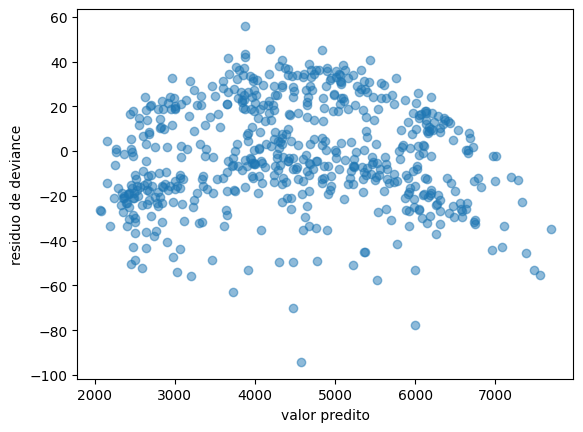

In [219]:
preds = quasi_poisson.fittedvalues # predicts no treino
residuos = quasi_poisson.resid_deviance

plt.scatter(preds, residuos, alpha=0.5)
plt.xlabel("valor predito")
plt.ylabel("residuo de deviance")
plt.show()

Os resíduos estão razoávelmente centrados em torno de 0, o que mostra uma boa estimativa da média da contagem.

Existe uma leve tendência de subida e descida no resíduo com a variação do valor predito, mas pouco.

### 5. Comparar o modelo final com um modelo de regressão linear simples (OLS) ajustado à mesma variável resposta. Discuta por que o modelo GLM é mais adequado neste caso.

In [220]:
linreg = sm.OLS(y_train, X_train).fit()

print(linreg.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     155.4
Date:                Tue, 15 Jul 2025   Prob (F-statistic):           6.41e-74
Time:                        22:02:05   Log-Likelihood:                -5082.2
No. Observations:                 584   AIC:                         1.017e+04
Df Residuals:                     580   BIC:                         1.019e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        479.9195    209.837      2.287      0.0

Em questão de resultado do treino, realmente os coeficientes significativos se manteram.

Porém a variável dependente que estamos prevendo é **discreta e não negativa**

Mais do que isso, a regressão linear assume **homocedasticidade**, o que vimos no gráfico que não é verdade. A variância de y cresce de acordo com a média (overdispersion), a variância não é constante.

Além disso, a regressão linear o impacto das variáveis independentes em unidades, o que não é verdade, aqui estamos relativizando com (%), o que é mais condizente para estas relações.

## 3) Pareamento por Escore de Propensão (PSM)

Nesta parte, você irá aplicar o método de Pareamento por Escore de Propensão (PSM) para estimar o efeito da presença de diabetes sobre os gastos médicos totais de indivíduos, com base em dados observacionais.

In [134]:
df = pd.read_csv("https://raw.githubusercontent.com/AILAB-CEFET-RJ/gcc1625/refs/heads/main/data/hc2021_dados.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22446 entries, 0 to 22445
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   dupersid        22446 non-null  int64 
 1   age             22446 non-null  int64 
 2   sex             22446 non-null  int64 
 3   race            22446 non-null  object
 4   poverty         22446 non-null  object
 5   diabetes        22446 non-null  int64 
 6   marital_status  22446 non-null  object
 7   totexp          22446 non-null  int64 
 8   ertexp          22446 non-null  int64 
 9   year            22446 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 1.7+ MB


,dupersid,age,sex,race,poverty,diabetes,marital_status,totexp,ertexp,year
0,2320005101,74,2,White,Low Income,0,Married,4908,0,2021
1,2320005102,85,1,White,Low Income,0,Married,21257,0,2021
2,2320006101,48,2,White,Near Poor,0,Divorced,827,0,2021
3,2320006102,23,1,White,Near Poor,0,Never Married,0,0,2021
4,2320006103,22,1,White,Near Poor,0,Never Married,0,0,2021


- dupersid: identificador único do indivíduo na amostra.
- age: idade do indivíduo (em anos).
- sex: sexo biológico (1 = masculino, 2 = feminino).
- race: raça declarada do indivíduo (ex.: White).
- poverty: nível de renda familiar classificado em categorias (ex.: Low Income,
Near Poor, Middle Income).
- diabetes: variável indicadora de presença de diabetes (1 = com diagnóstico, 0 = sem diagnóstico).
- marital_status: estado civil do indivíduo (ex.: Married, Never Married, Divorced, Widowed).
- totexp: valor total de despesas com saúde no ano (em dólares).
- ertexp: valor das despesas com atendimentos de emergência (em dólares).
- year: ano da coleta dos dados (todos os registros são de 2021).

### 1. Análise Exploratória
  - Apresente uma análise descritiva das covariáveis (age, sex, race, poverty, marital_status).
  - Compare os grupos com e sem diabetes em termos dessas características e do desfecho (totexp).

In [135]:
df["age"].describe()

,age
count,22446.000000
mean,51.379756
std,18.646288
min,18.000000
25%,36.000000
50%,52.000000
75%,67.000000
max,85.000000


Pessoas com média de 50 anos, e um desvio padrão de 18.64 anos.

In [136]:
# frequência das categóricas
print(df['race'].value_counts(normalize=True), "\n")
print(df['poverty'].value_counts(normalize=True), "\n")
print(df['marital_status'].value_counts(normalize=True))

race
White       0.758487
Black       0.148222
Asian       0.056179
Multiple    0.028335
AI/AN       0.008777
Name: proportion, dtype: float64 

poverty
High Income      0.379622
Middle Income    0.279693
Poor             0.158647
Low Income       0.132763
Near Poor        0.049274
Name: proportion, dtype: float64 

marital_status
Married          0.462889
Never Married    0.281386
Divorced         0.143277
Widowed          0.088479
Separated        0.023969
Name: proportion, dtype: float64


Pessoas majoritáriamente brancas, com alta renda, casadas.

In [137]:
df["totexp"].describe()

,totexp
count,2.244600e+04
mean,8.929659e+03
std,2.963747e+04
min,0.000000e+00
25%,3.412500e+02
50%,2.059500e+03
75%,7.757750e+03
max,2.187290e+06


Valor médio de despesas com saúde anual aproximadamente 9000 dolares.

In [138]:
print(pd.crosstab(df["sex"], df['diabetes'], normalize='columns'), "\n")
print(pd.crosstab(df["race"], df['diabetes'], normalize='columns'), "\n")
print(pd.crosstab(df["poverty"], df['diabetes'], normalize='columns'), "\n")
print(pd.crosstab(df["marital_status"], df['diabetes'], normalize='columns'), "\n")

diabetes         0         1
sex                         
1         0.462205  0.461997
2         0.537795  0.538003 

diabetes         0         1
race                        
AI/AN     0.007684  0.015389
Asian     0.057263  0.049623
Black     0.138874  0.204774
Multiple  0.027723  0.032035
White     0.768456  0.698178 

diabetes              0         1
poverty                          
High Income    0.398972  0.262563
Low Income     0.128543  0.158291
Middle Income  0.279722  0.279523
Near Poor      0.045842  0.070038
Poor           0.146921  0.229585 

diabetes               0         1
marital_status                    
Divorced        0.134773  0.194724
Married         0.465165  0.449121
Never Married   0.302928  0.151068
Separated       0.021701  0.037688
Widowed         0.075433  0.167399 



Interessante notar como mudam as distribuições de pobreza e estado-marital quando se possui diabetes.

A concentração aumenta em pessoas de renda mais baixa. Também aumenta em pessoas viúvas (mas talvez seja consequência de idade).

In [139]:
df.groupby("diabetes")[["age","totexp"]].mean()

,age,totexp
diabetes,,
0,49.395442,7644.789897
1,63.384108,16702.633166


A idade média das pessoas com diabetes é maior que as sem, assim como suas despesas anuais com saúde são quase dobradas. As demais variáveis parecem estar bem distribuídas.

### 2. Estimativa do Escore de Propensão
  - Modele a probabilidade de ter diabetes usando uma regressão logística com as covariáveis explicativas apropriadas.
  - Apresente os coeficientes estimados e discuta os fatores mais associados à presença de diabetes.



As variáveis race, poverty, marital_status são categóricas e portanto codificá-las é importante.

In [143]:
df["poverty"].unique(), df["marital_status"].unique()

(array(['Low Income', 'Near Poor', 'Middle Income', 'High Income', 'Poor'],
       dtype=object),
 array(['Married', 'Divorced', 'Never Married', 'Widowed', 'Separated'],
       dtype=object))

In [156]:
# Ordinal Encoding
poverty_order = {
    'Poor': 0,
    'Near Poor': 1,
    'Low Income': 2,
    'Middle Income': 3,
    'High Income': 4
}
df['poverty_ordinal'] = df['poverty'].map(poverty_order)

# One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=['race', 'marital_status'], drop_first=True)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22446 entries, 0 to 22445
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   dupersid                      22446 non-null  int64 
 1   age                           22446 non-null  int64 
 2   sex                           22446 non-null  int64 
 3   poverty                       22446 non-null  object
 4   diabetes                      22446 non-null  int64 
 5   totexp                        22446 non-null  int64 
 6   ertexp                        22446 non-null  int64 
 7   year                          22446 non-null  int64 
 8   poverty_ordinal               22446 non-null  int64 
 9   race_Asian                    22446 non-null  bool  
 10  race_Black                    22446 non-null  bool  
 11  race_Multiple                 22446 non-null  bool  
 12  race_White                    22446 non-null  bool  
 13  marital_status_M

Não existe necessidade de utilizar estas variáveis dummy, visto que não diferenciam tanto entre pessoas com ou sem diabetes, pode inclusiver supercomplicar o modelo.

In [167]:
X = df_encoded[['age', 'poverty_ordinal', 'totexp', 'ertexp']]

X_ = sm.add_constant(X)
y = df_encoded["diabetes"]

logreg = sm.Logit(y, X_).fit()
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.364190
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               diabetes   No. Observations:                22446
Model:                          Logit   Df Residuals:                    22441
Method:                           MLE   Df Model:                            4
Date:                Tue, 15 Jul 2025   Pseudo R-squ.:                  0.1081
Time:                        19:43:09   Log-Likelihood:                -8174.6
converged:                       True   LL-Null:                       -9164.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -3.8059      0.083    -45.620      0.000      -3.969      -3.642
age           

O R² estimado é baixo, o modelo não explica bem a variação de diabetes. Talvez o modelo seja muito simples e não capture as relações não lineares entre as variáveis, ou mesmo variáveis cruciais como **histórico familiar, sedentarismo, IMC**...

Entretanto, idade, nível de pobreza e despesas anuais com saúde são variáveis significativas para a previsão de diabetes (apesar de só a pobreza apresentar um valor alto em magnitude).



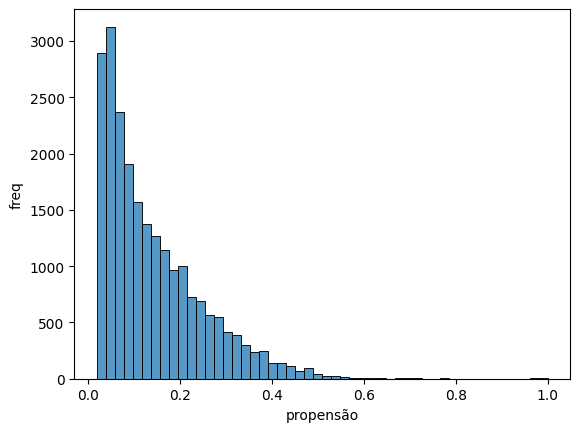

In [165]:
prop_score = logreg.predict(X_)

sns.histplot(prop_score, bins=50)
plt.xlabel('propensão')
plt.ylabel('freq')
plt.show()

Podemos ver que os scores de propensão previstas pelo modelo subestima a presença de diabetes.

### 3. Pareamento 1:1 por escore de propensão
  - Realize o pareamento 1:1 sem reposição com base no escore estimado.
  - Avalie o balanceamento das covariáveis antes e depois do pareamento.



diabetes = 1 -> tratado

In [180]:
from sklearn.neighbors import NearestNeighbors

prop_score_tratado = prop_score[y == 1]
prop_score_controle = prop_score[y == 0]

X_tratado = X[y == 1].copy()
X_controle = X[y == 0].copy()

nn = NearestNeighbors(n_neighbors=1) # PAREAMENTO 1:1
nn.fit(prop_score_controle.values.reshape(-1, 1))

dists, idxs = nn.kneighbors(prop_score_tratado.values.reshape(-1, 1))
dists, idxs = dists.flatten(), idxs.flatten()

X_controle_pareado = X_controle.iloc[idxs].copy()
X_controle_pareado['distancia'] = dists

dists

array([2.40518892e-05, 1.19918293e-06, 9.19293149e-07, ...,
       0.00000000e+00, 4.67585342e-05, 3.00162663e-05])

- |SMD| < 0.1 -> bom
- |SMD| > 0.2 -> ruim

In [183]:
def smd_(X0,X1,vars):
    smd = {}
    for var in vars:
        mean0, mean1 = X0[var].mean(), X1[var].mean()
        std0, std1 = X0[var].std(), X1[var].std()
        pooled_std = np.sqrt((std0**2 + std1**2) / 2)
        smd[var] = (mean0 - mean1) / pooled_std
    return smd

smd_antes = smd_(X_tratado, X_controle, X.columns)
smd_depois = smd_(X_tratado, X_controle_pareado, X.columns)

print("SMD antes do pareamento:")
for var, val in smd_antes.items():
    print(f"{var}: {val:.3f}")

print("\nSMD depois do pareamento:")
for var, val in smd_depois.items():
    print(f"{var}: {val:.3f}")

SMD antes do pareamento:
age: 0.858
poverty_ordinal: -0.319
totexp: 0.323
ertexp: 0.074

SMD depois do pareamento:
age: -0.096
poverty_ordinal: -0.112
totexp: 0.134
ertexp: -0.003


### 4. Estimativa do Efeito do Tratamento (ATT)
  - Calcule a diferença média nos gastos totais (totexp) entre indivíduos com diabetes e seus controles pareados.
  - Construa um intervalo de confiança para essa diferença com bootstrap.



In [185]:
despesa_tratado = X_tratado['totexp'].values
despesa_controle = X_controle_pareado["totexp"].values

att = np.mean(despesa_tratado - despesa_controle)
att

np.float64(3772.0059673366836)

In [187]:
# intervalo boostrap
n = 1000
diffs = []

# distribuicao
n = len(despesa_tratado)
for _ in range(n):
    idxs = np.random.choice(n, n, replace=True)
    diff_boot = np.mean(despesa_tratado[idxs] - despesa_controle[idxs])
    diffs.append(diff_boot)

# Intervalo de confiança 95%
lower = np.percentile(diffs, 2.5)
upper = np.percentile(diffs, 97.5)

print(f"({lower:.3f}, {upper:.3f})")

(2584.224, 4918.084)


### 5. Discussão
  - Comente sobre a qualidade do pareamento e possíveis vieses remanescentes.
  - Interprete o ATT obtido: qual o impacto médio estimado da diabetes sobre os gastos médicos?

Idealmente, para um bom pareamento, o SMD deve ficar abaixo de 0.1, o que indicaria bom balanceamento entre tratado e controle.

- Tivemos redução boa no SMD da idade (0.85 -> 0.09), indicando bom balanceamento

- Porém na despesa total e na pobreza, tivemos redução (0.32 -> 0.11) e (0.32 -> 0.13) porém ainda levemente acima de 0.1. (Aceitável).

- O pareamento obviamente só corrige os vieses das covariáveis que incluimos no modelo. Então ainda existe viés residual.

- O nearest neighbor também é um método aproximativo, não encontra o pareamento perfeito, apenas o mais próximo.

Além disso, a amostra retirada pode não ser representativa de toda a população.


- Em média, os indivíduos com diabetes gastam cerca de 3772 dólares a mais em despesa total com saúde anual do que seus controles (pareados).

- Com 95% de confiança, a diferença real está entre 2584 e 4918 dólares.

- É uma diferença estatísticamente significativa!

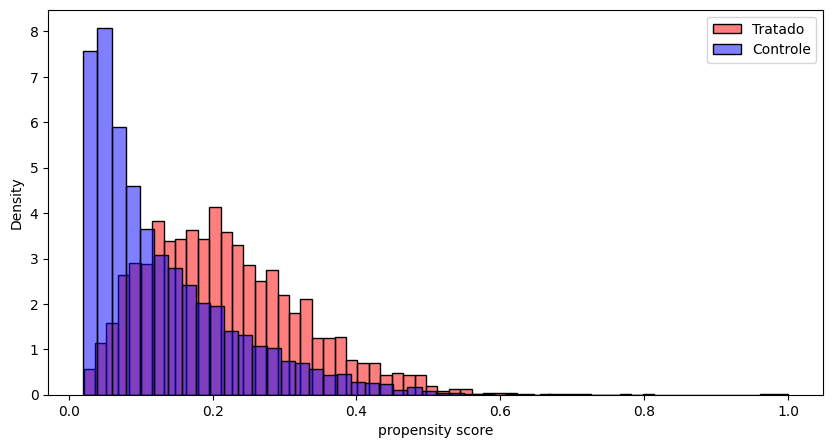

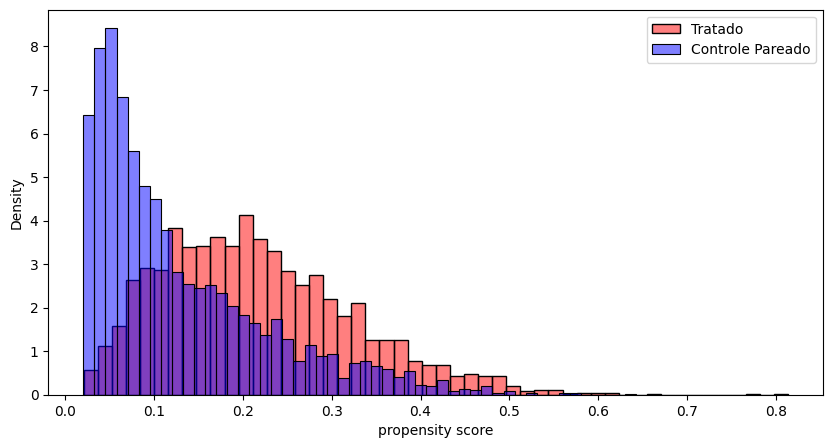

In [191]:
plt.figure(figsize=(10, 5))
sns.histplot(prop_score[y == 1], color='red', label='Tratado', bins=50, stat='density', alpha=0.5)
sns.histplot(prop_score[y == 0], color='blue', label='Controle', bins=50, stat='density', alpha=0.5)
plt.xlabel('propensity score')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(prop_score[y == 1], color='red', label='Tratado', bins=50, stat='density', alpha=0.5)
sns.histplot(prop_score_controle.iloc[idxs], color='blue', label='Controle Pareado', bins=50, stat='density', alpha=0.5)
plt.xlabel('propensity score')
plt.legend()
plt.show()

Realmente, o pareamento melhorou a sobreposição das distribuições, reduzindo o viés.

Mas ainda existem pares que não estão bem balanceados, ainda tem execesso de controles com propensão baixa.

## 4) Inferência Bayesiana
Nesta parte, você irá utilizar a inferência bayesiana para estimar a proporção de sobrevivência (θ) de passageiros, incorporando diferentes hipóteses a priori e comparando-as com a evidência empírica observada.


In [192]:
df = pd.read_csv("titanic.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 1. Pré-processamento dos dados
  a) Filtre apenas os passageiros adultos (idade ≥ 18).
  
  b) Crie uma variável binária indicando se o passageiro sobreviveu (1) ou não (0).

In [197]:
df.dropna(subset=["Age"])
df_adultos = df[df["Age"]>=18]
df_adultos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 601 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  601 non-null    int64  
 1   Survived     601 non-null    int64  
 2   Pclass       601 non-null    int64  
 3   Name         601 non-null    object 
 4   Sex          601 non-null    object 
 5   Age          601 non-null    float64
 6   SibSp        601 non-null    int64  
 7   Parch        601 non-null    int64  
 8   Ticket       601 non-null    object 
 9   Fare         601 non-null    float64
 10  Cabin        166 non-null    object 
 11  Embarked     599 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 61.0+ KB


### 2. Modelagem a priori para θ
  a) Escolha duas distribuições Beta para θ, por exemplo:
     
- Beta(1,1): não informativa (uniforme)
     
- Beta(2,5): refletindo a crença de que poucos adultos sobrevivem

b) Justifique suas escolhas para as distribuições a priori.

Beta(1,1) assume que qualquer chance de sobrevivência (0 a 1) tem a mesma probabilidade antes de ver os dados. Não queremos influenciar nossa análise com conhecimento prévio.

Beta(2,5) assume que poucos adultos sobreviveram. Representa nosso conhecimento prévio que a maioria de lá não sobreviveu, mas ainda permite que ajustamos com os dados. Não é nada absurdo.



### 3. Cálculo da distribuição a posteriori
  a) Determine os parâmetros da posteriori com base nos dados observados.

  b) Plote as distribuições a priori e a posteriori em um mesmo gráfico.
  
  c) Compare e interprete as distribuições resultantes.

Nossos dados seguem a distribuição de Bernoulli.

Nossa priori é $Beta(\alpha, \beta)$, portanto nossa posteriori é $Beta(\alpha + sucessos, \beta + falhas)$

In [198]:
s = df_adultos["Survived"].sum() # (1)
f = len(df_adultos) - s # (0)
s, f

(np.int64(229), np.int64(372))

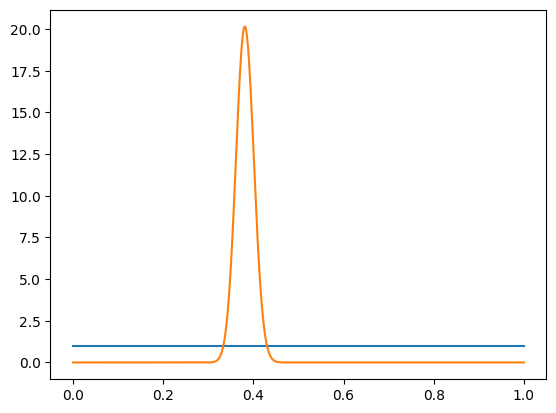

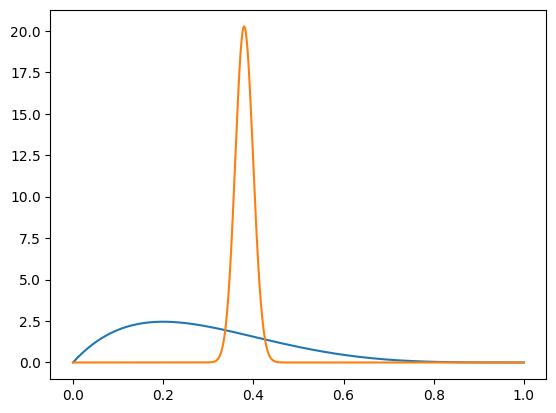

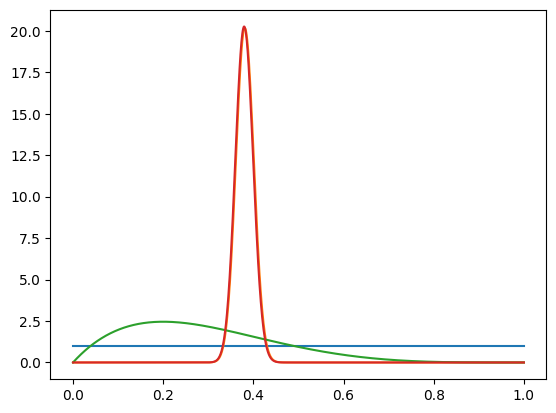

In [211]:
from scipy.stats import beta

# beta(1,1)
a1, b1 = 1, 1

# beta(2,5)
a2, b2 = 2, 5

x = np.linspace(0,1,1000)
plt.plot(x, beta.pdf(x, a1, b1))
plt.plot(x, beta.pdf(x, a1 + s, b1 + f))
plt.show()

plt.plot(x, beta.pdf(x, a2, b2))
plt.plot(x, beta.pdf(x, a2 + s, b2 + f))
plt.show()

# sobrepostas
plt.plot(x, beta.pdf(x, a1, b1))
plt.plot(x, beta.pdf(x, a1 + s, b1 + f))
plt.plot(x, beta.pdf(x, a2, b2))
plt.plot(x, beta.pdf(x, a2 + s, b2 + f))
plt.show()

Nota-se que ambas posterioris são muito similares, pois como temos muitos dados, a crença inicial é insignificante.

Este é um exemplo de que na inferência bayesiana, com muitos dados, a influência da priori desaparece.

### 4. Estatísticas da posteriori
  a) Calcule a média e o intervalo de credibilidade de 95% para θ, em cada cenário.
  
  b) Interprete os resultados obtidos, considerando o contexto do problema.



In [206]:
a, b = 1 + s, 1 + f
mu_1 = a / (a + b)

beta.ppf([0.025, 0.975], a, b), mu_1

(array([0.34307621, 0.42052123]), np.float64(0.3814262023217247))

In [207]:
a, b = 2 + s, 5 + f
mu_2 = a / (a+b)

beta.ppf([0.025, 0.975], a, b), mu_2

(array([0.34177411, 0.41884252]), np.float64(0.37993421052631576))

Ambas as estimativas $\theta$ são extremamente próximas, com intervalos parecidos e estreitos, indicando alta confiança que a taxa verdadeira de sucesso está nesse intervalo.

A escolha da priori não influencia de forma significativa no resultado com esse grande volume de dados.

Aplicando no nosso contexto, ambos os modelos estimam que 38% dos adultos sobrevivem ao titanic, com bastante confiança.

### 5. Discussão
  - Discuta como as diferentes escolhas de priori influenciaram os resultados.
  - Em que contextos o uso da abordagem bayesiana pode ser mais adequado do que abordagens frequentistas?

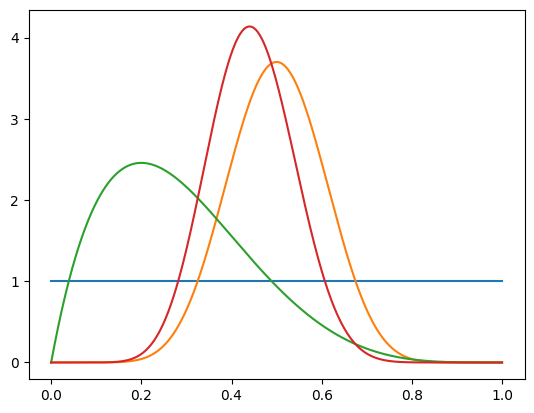

In [213]:
# plots com apenas 10 sucessos e 10 falhas

plt.plot(x, beta.pdf(x, 1, 1))
plt.plot(x, beta.pdf(x, 1 + 10, 1 + 10))
plt.plot(x, beta.pdf(x, 2, 5))
plt.plot(x, beta.pdf(x, 2 + 10, 5 + 10))
plt.show()

A inferência bayesiana pode ser prefirível quando temos poucos dados, e podemos nos guiar por "crenças" que impactarão bastante no resultado final.